Data Cleaning and Understanding

In [4]:
#Importing libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
wmt_df = pd.read_csv(r"C:\Users\pooja\OneDrive\Desktop\Data_Analytics\Walmart Data Analysis and Forcasting.csv")

DATA CLEANING AND UNDERSTANDING

In [6]:
#Showing First few Rows
wmt_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


AVERAGE SALES PER STORE

In [29]:
# Group by Store and calculate average weekly sales for each store
avg_sales_per_store = wmt_df.groupby('Store')['Weekly_Sales'].mean()
print(avg_sales_per_store)


Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64


In [8]:
#To see if the changes are made
wmt_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
#Check the describtion of the numeric features
wmt_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
#Check the describtion of the categorical  features
wmt_df.describe(include=['O'])

,Date
count,6435
unique,143
top,05-02-2010
freq,45


In [11]:
wmt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [30]:
# Convert Date column to datetime and extract month
wmt_df['Date'] = pd.to_datetime(wmt_df['Date'])
wmt_df['Month'] = wmt_df['Date'].dt.month

# Group by month and calculate total sales
monthly_sales = wmt_df.groupby('Month')['Weekly_Sales'].sum()
print(monthly_sales)


ValueError: time data "19-02-2010" doesn't match format "%m-%d-%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [40]:
# Average sales during holidays vs non-holidays
sales_holiday_comparison = wmt_df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

In [12]:
#To see the last few rows
wmt_df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [28]:
# Correlation matrix
correlation_matrix = wmt_df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

In [13]:
wmt_df.shape

(6435, 8)

In [14]:
#To check if the headers is well written
wmt_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [15]:
#Checking for the number of each data type----
df_numeric = wmt_df.select_dtypes(include='number') # extract columns with number
num = len(df_numeric.columns) # sum the columns extracted
print(f'We have {num} numeric columns') #format string

df_obj = wmt_df.select_dtypes(include='object')
num_2 = len(df_obj.columns)
print(f'we have {num_2} object columns')

df_bool = wmt_df.select_dtypes(include='bool')
num_3 = len(df_bool.columns)
print(f'we have {num_3} boolean columns')

print(f'With a total number of {num + num_2 + num_3} columns')

We have 7 numeric columns
we have 1 object columns
we have 0 boolean columns
With a total number of 8 columns


In [16]:
#To check if there is missing data in the datframe
wmt_df.isnull().values.any()

np.False_

In [17]:
#Checking for the percentage of the missing data

#creating a dataframe for percebtage of missing data
percentage_of_missing_data = pd.DataFrame({'Percentage of Missing of Data':round((wmt_df.isnull().sum()/len(wmt_df.index)) * 100,2)}) 
percentage_of_missing_data = percentage_of_missing_data.sort_values(by='Percentage of Missing of Data',ascending=False)
percentage_of_missing_data

,Percentage of Missing of Data
Store,0.0
Date,0.0
Weekly_Sales,0.0
Holiday_Flag,0.0
Temperature,0.0
Fuel_Price,0.0
CPI,0.0
Unemployment,0.0


In [18]:
#To check for unique items in our categorical Features
wmt_df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

WEEKLY_SALES

In [39]:
# Calculate total and average sales
total_sales = wmt_df['Weekly_Sales'].sum()
avg_sales = wmt_df['Weekly_Sales'].mean()
print(f"Total Sales: {total_sales}, Average Sales: {avg_sales}")

# Identify outliers in sales (using z-score)
from scipy import stats
wmt_df['Sales_Zscore'] = stats.zscore(wmt_df['Weekly_Sales'])
outliers = wmt_df[wmt_df['Sales_Zscore'].abs() > 3]  # Sales 3 standard deviations away from the mean
print(outliers)

Total Sales: 6737218987.11, Average Sales: 1046964.8775617715
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
189       2  24-12-2010    3436007.68             0        49.97       2.886   
241       2  23-12-2011    3224369.80             0        46.66       3.112   
471       4  26-11-2010    2789469.45             1        48.08       2.752   
474       4  17-12-2010    2740057.14             0        46.57       2.884   
475       4  24-12-2010    3526713.39             0        43.21       2.887   
523       4  25-11-2011    3004702.33             1        47.96       3.225   
526       4  16-12-2011    2771397.17             0        36.44       3.149   
527       4  23-12-2011    3676388.98             0        35.92       3.103   
1329     10  26-11-2010    2939946.38             1        55.33       3.162   
1332     10  17-12-2010    2811646.85             0        59.15       3.125   
1333     10  24-12-2010    3749057.69             0       

HOLIDAY_FLAG

In [37]:
# Calculate average sales for holidays vs. non-holidays
holiday_sales = wmt_df[wmt_df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
non_holiday_sales = wmt_df[wmt_df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
print(f"Holiday Sales: {holiday_sales}, Non-Holiday Sales: {non_holiday_sales}")

Holiday Sales: 1122887.8923555557, Non-Holiday Sales: 1041256.3802088555


CORRELATION BETWEEN TEMPERATURE AND SALES

In [36]:
# Check correlation between temperature and weekly sales
correlation_temp_sales = wmt_df['Temperature'].corr(wmt_df['Weekly_Sales'])
print(f"Correlation between Temperature and Sales: {correlation_temp_sales}")

Correlation between Temperature and Sales: -0.06381001317946955


FUEL_PRICE

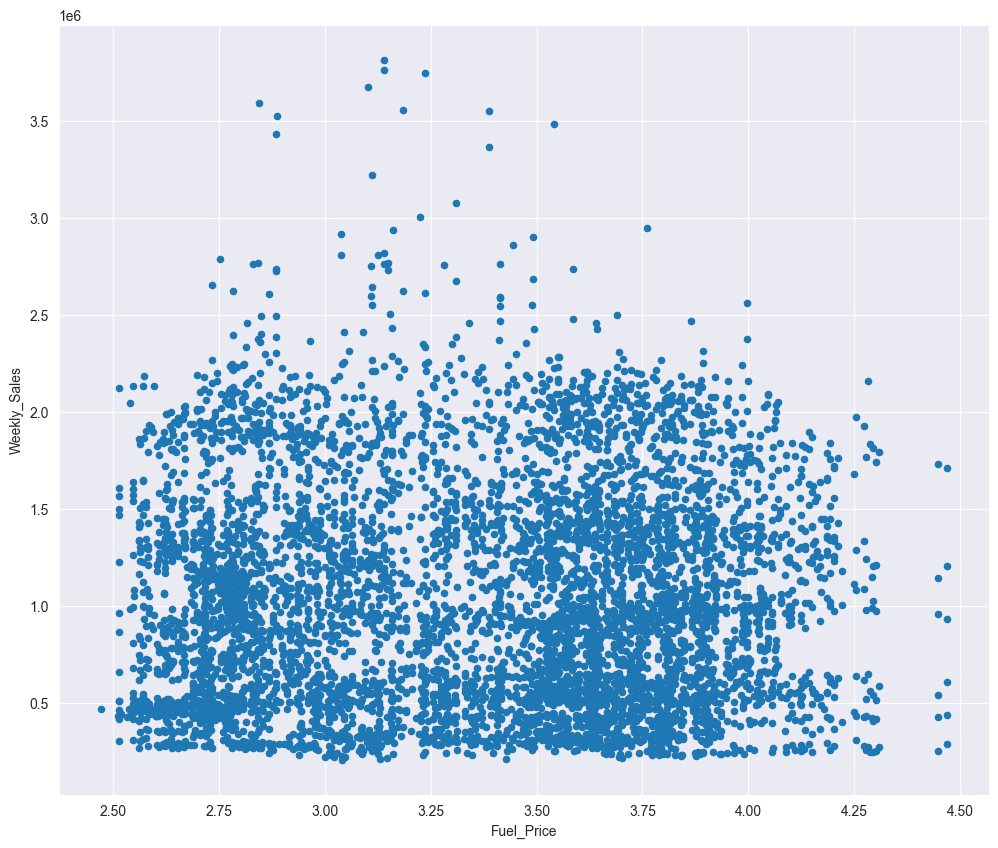

Correlation between Fuel Price and Sales: 0.009463786314475142


In [35]:
# Plot sales against fuel price to check trends
import matplotlib.pyplot as plt
wmt_df.plot(x='Fuel_Price', y='Weekly_Sales', kind='scatter')
plt.show()

# Check correlation
correlation_fuel_sales = wmt_df['Fuel_Price'].corr(wmt_df['Weekly_Sales'])
print(f"Correlation between Fuel Price and Sales: {correlation_fuel_sales}")


TOP WEEKLY SALES WITH TEMPERATURE AND FUEL_PRICE

In [32]:
#Top Sales
Top_Sales =wmt_df.value_counts(["Fuel_Price"]).reset_index(name= "Temperature")[:10]
Top_Sales

,Fuel_Price,Temperature
0,3.638,39
1,3.630,34
2,2.771,29
3,3.891,29
4,3.524,28
5,3.594,28
6,2.720,28
7,3.523,27
8,3.666,27
9,3.842,25


CONSUMER PRICE INDEX(CPI)

In [34]:
# Correlation between CPI and weekly sales
correlation_cpi_sales = wmt_df['CPI'].corr(wmt_df['Weekly_Sales'])
print(f"Correlation between CPI and Sales: {correlation_cpi_sales}")

Correlation between CPI and Sales: -0.0726341620401763


UNEMPLOYMENT RATE

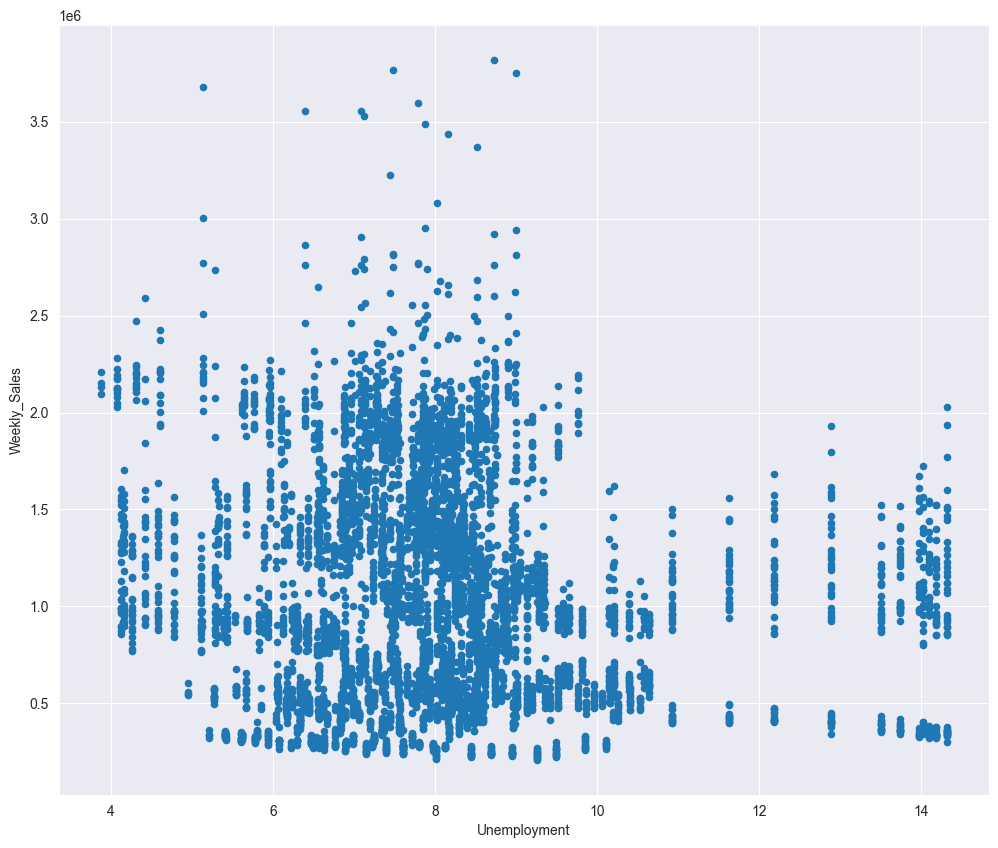

Correlation between Unemployment and Sales: -0.10617608965795418


In [33]:
# Plot unemployment rate against sales to observe trends
wmt_df.plot(x='Unemployment', y='Weekly_Sales', kind='scatter')
plt.show()

# Check correlation
correlation_unemployment_sales = wmt_df['Unemployment'].corr(wmt_df['Weekly_Sales'])
print(f"Correlation between Unemployment and Sales: {correlation_unemployment_sales}")


NameError: name 'Top_Sales' is not defined

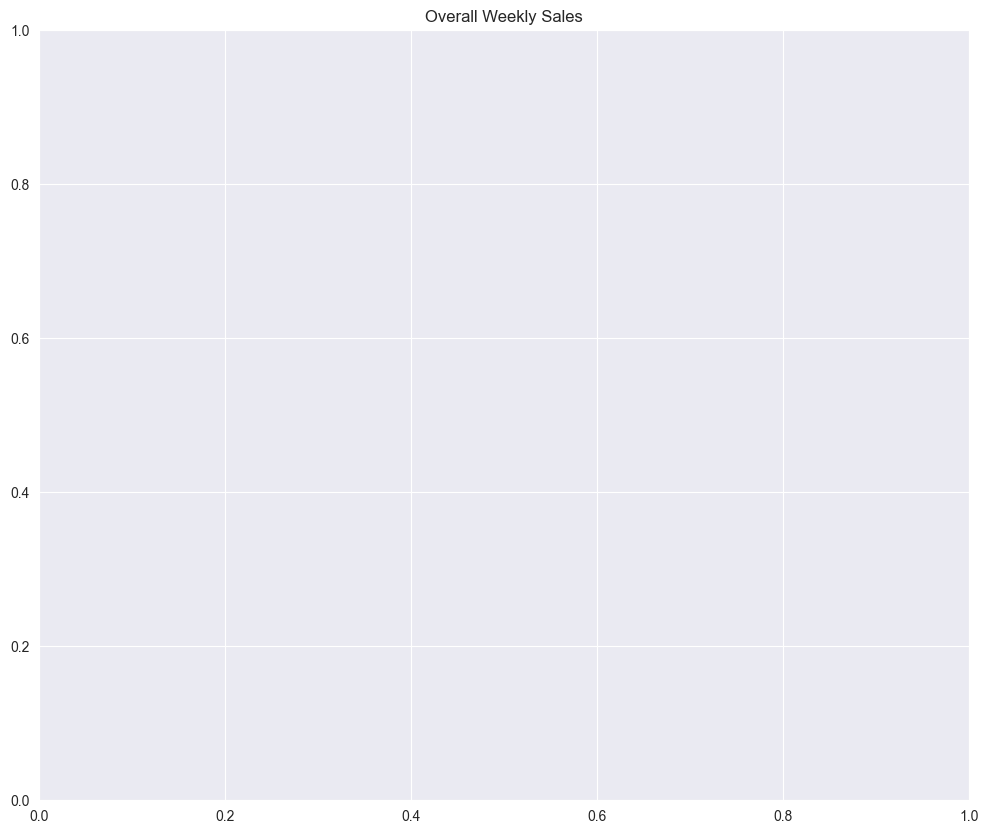

In [31]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.title("Overall Weekly Sales")
barplot = sns.barplot(data=Top_Sales, x="Weekly Sales", y="Temperature", hue="Fuel_Price", palette="CMRmap", dodge=False)
barplot.set_xticklabels(rotation=50, labels=Top_Sales.Fuel_Price)
plt.ylabel("Temperature")
plt.show()

RELATIONSHIP BETWEEN(WEEKLY_SALES & FUEL_PRICE) 
USING MATPLOTLIB FOR A LINE PLOT:

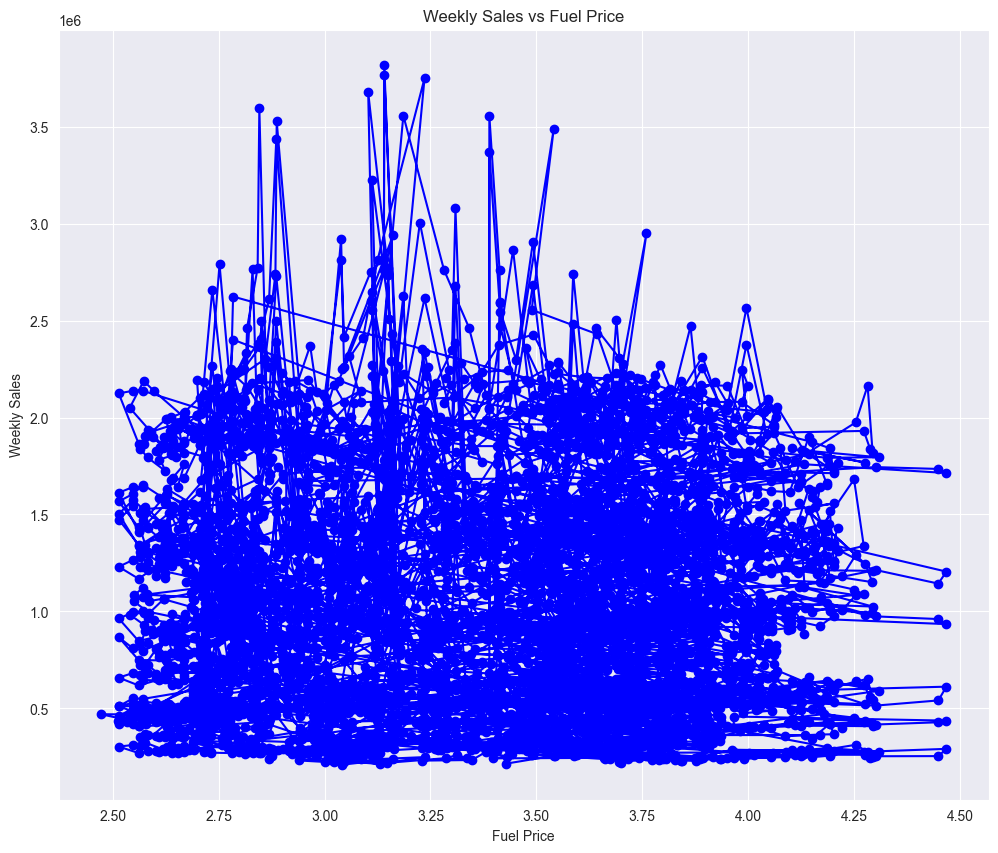

In [41]:
import matplotlib.pyplot as plt

# Line plot between Weekly_Sales and Fuel_Price
plt.plot(wmt_df['Fuel_Price'], wmt_df['Weekly_Sales'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Weekly Sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')

# Show plot
plt.show()


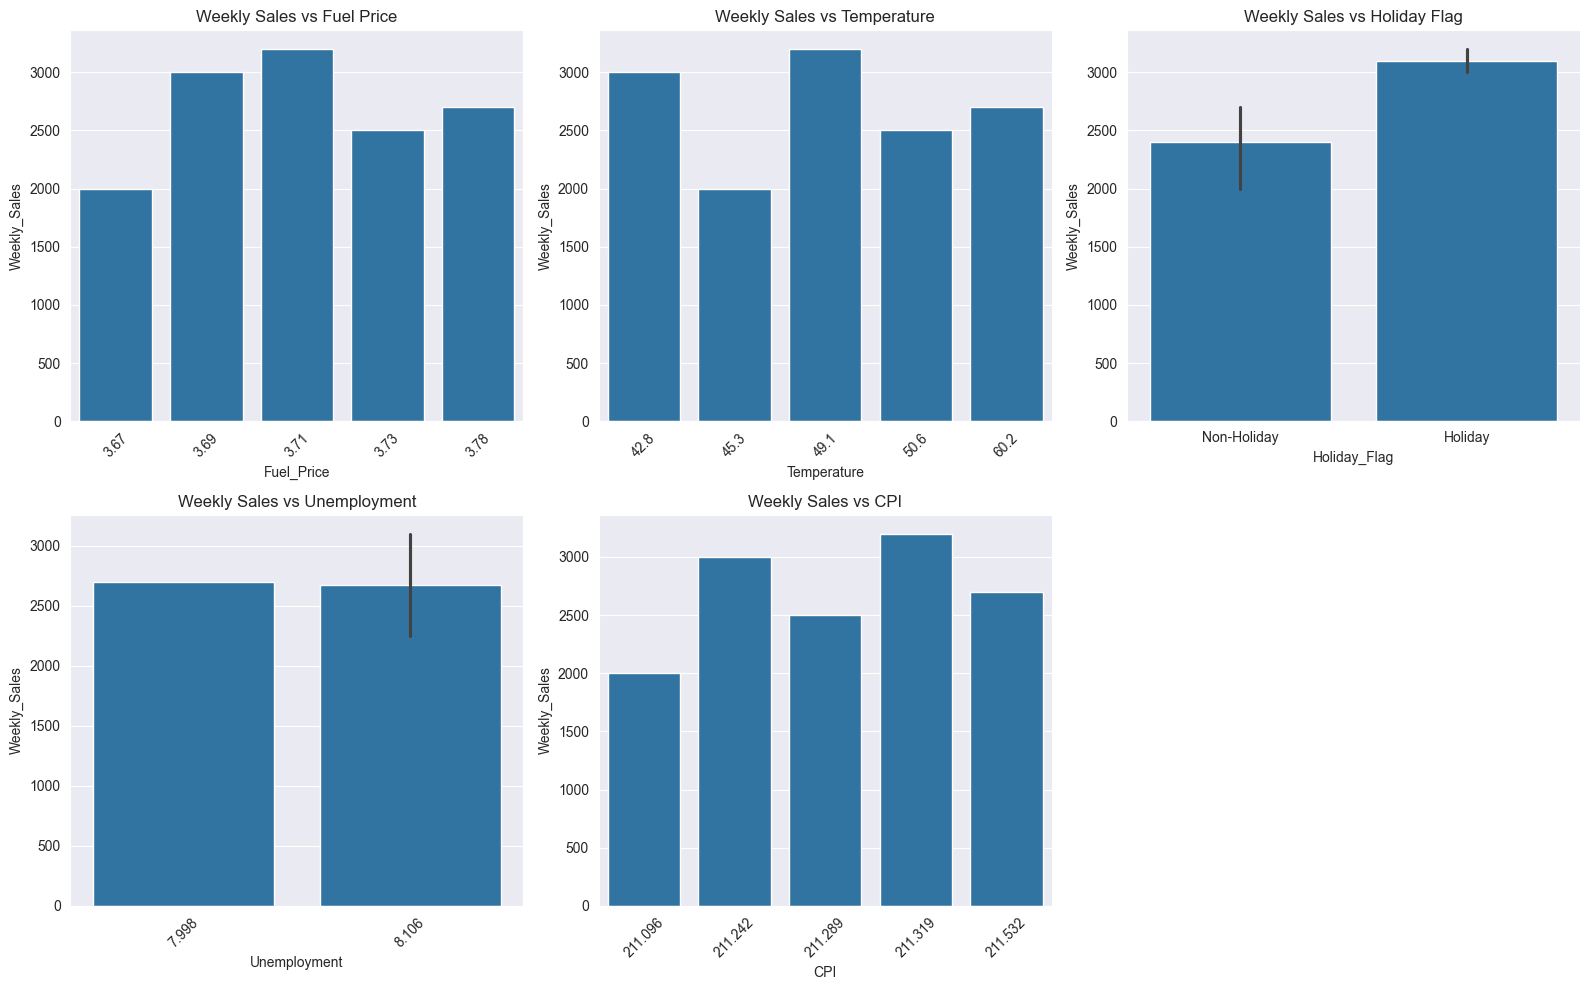

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
data = {
    'Store': [1, 2, 1, 2, 3],
    'Date': ['2012-01-01', '2012-01-01', '2012-02-01', '2012-02-01', '2012-03-01'],
    'Weekly_Sales': [2000, 3000, 2500, 3200, 2700],
    'Holiday_Flag': [0, 1, 0, 1, 0],
    'Temperature': [45.3, 42.8, 50.6, 49.1, 60.2],
    'Fuel_Price': [3.67, 3.69, 3.73, 3.71, 3.78],
    'CPI': [211.096, 211.242, 211.289, 211.319, 211.532],
    'Unemployment': [8.106, 8.106, 8.106, 8.106, 7.998]
}

wmt_df = pd.DataFrame(data)

# Set up the figure and axis
plt.figure(figsize=(16, 10))

# Bar plot for Weekly Sales vs Fuel Price
plt.subplot(2, 3, 1)
sns.barplot(x='Fuel_Price', y='Weekly_Sales', data=wmt_df)
plt.title('Weekly Sales vs Fuel Price')
plt.xticks(rotation=45)

# Bar plot for Weekly Sales vs Temperature
plt.subplot(2, 3, 2)
sns.barplot(x='Temperature', y='Weekly_Sales', data=wmt_df)
plt.title('Weekly Sales vs Temperature')
plt.xticks(rotation=45)

# Bar plot for Weekly Sales vs Holiday Flag
plt.subplot(2, 3, 3)
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=wmt_df)
plt.title('Weekly Sales vs Holiday Flag')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])

# Bar plot for Weekly Sales vs Unemployment
plt.subplot(2, 3, 4)
sns.barplot(x='Unemployment', y='Weekly_Sales', data=wmt_df)
plt.title('Weekly Sales vs Unemployment')
plt.xticks(rotation=45)

# Bar plot for Weekly Sales vs CPI
plt.subplot(2, 3, 5)
sns.barplot(x='CPI', y='Weekly_Sales', data=wmt_df)
plt.title('Weekly Sales vs CPI')
plt.xticks(rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()